<a href="https://colab.research.google.com/github/ChangYeonMyung/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_6%2C7%EC%9E%A5_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cymyung","key":"3dd098f9e133156fb8630f03443b5c8a"}'}

### Kaggle API 키 사용을 위한 Colab 환경 설정

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Kaggle 데이터셋 다운로드

In [3]:
!kaggle competitions download -c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 1.32GB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


### Kaggle 데이터셋 DataFrame 로드 및 살펴보기

In [4]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train        = pd.read_csv('train.csv')
stores       = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil          = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')

# 판매 데이터 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


### Kaggle 데이터셋 측정

In [5]:
# 판매 데이터 기본 통계량
train.describe()

# 매장 데이터 기본 정보
stores.head()

# 원유 가격 데이터 기본 정보
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

### 데이터 분포 시각화

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

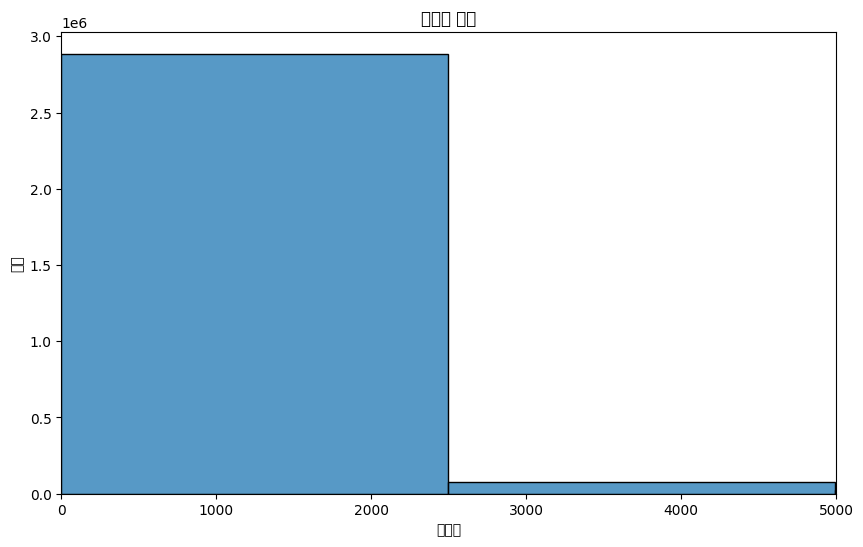

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

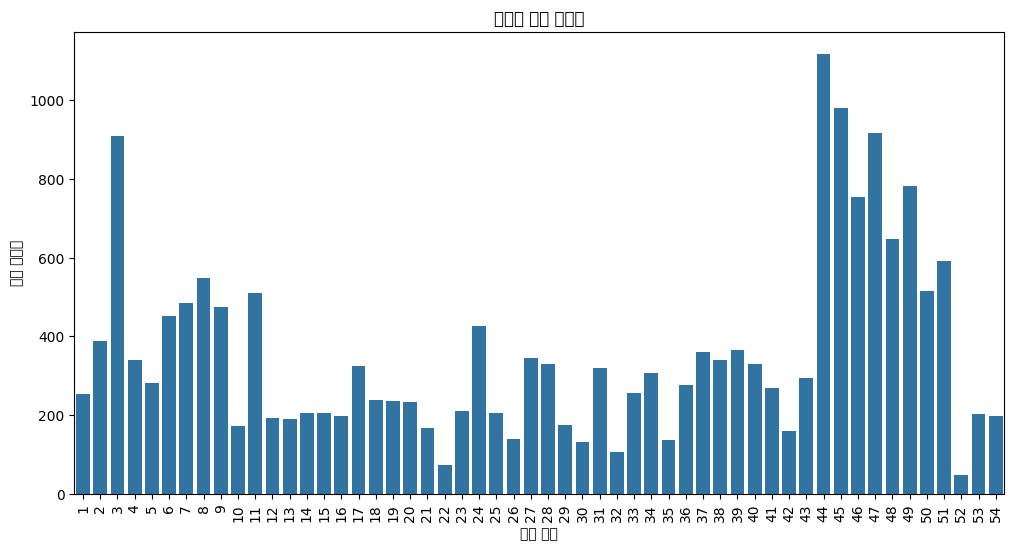

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [19]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print(train.isnull().sum())
print(stores.isnull().sum())
print(oil.isnull().sum())
print(holidays_events.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

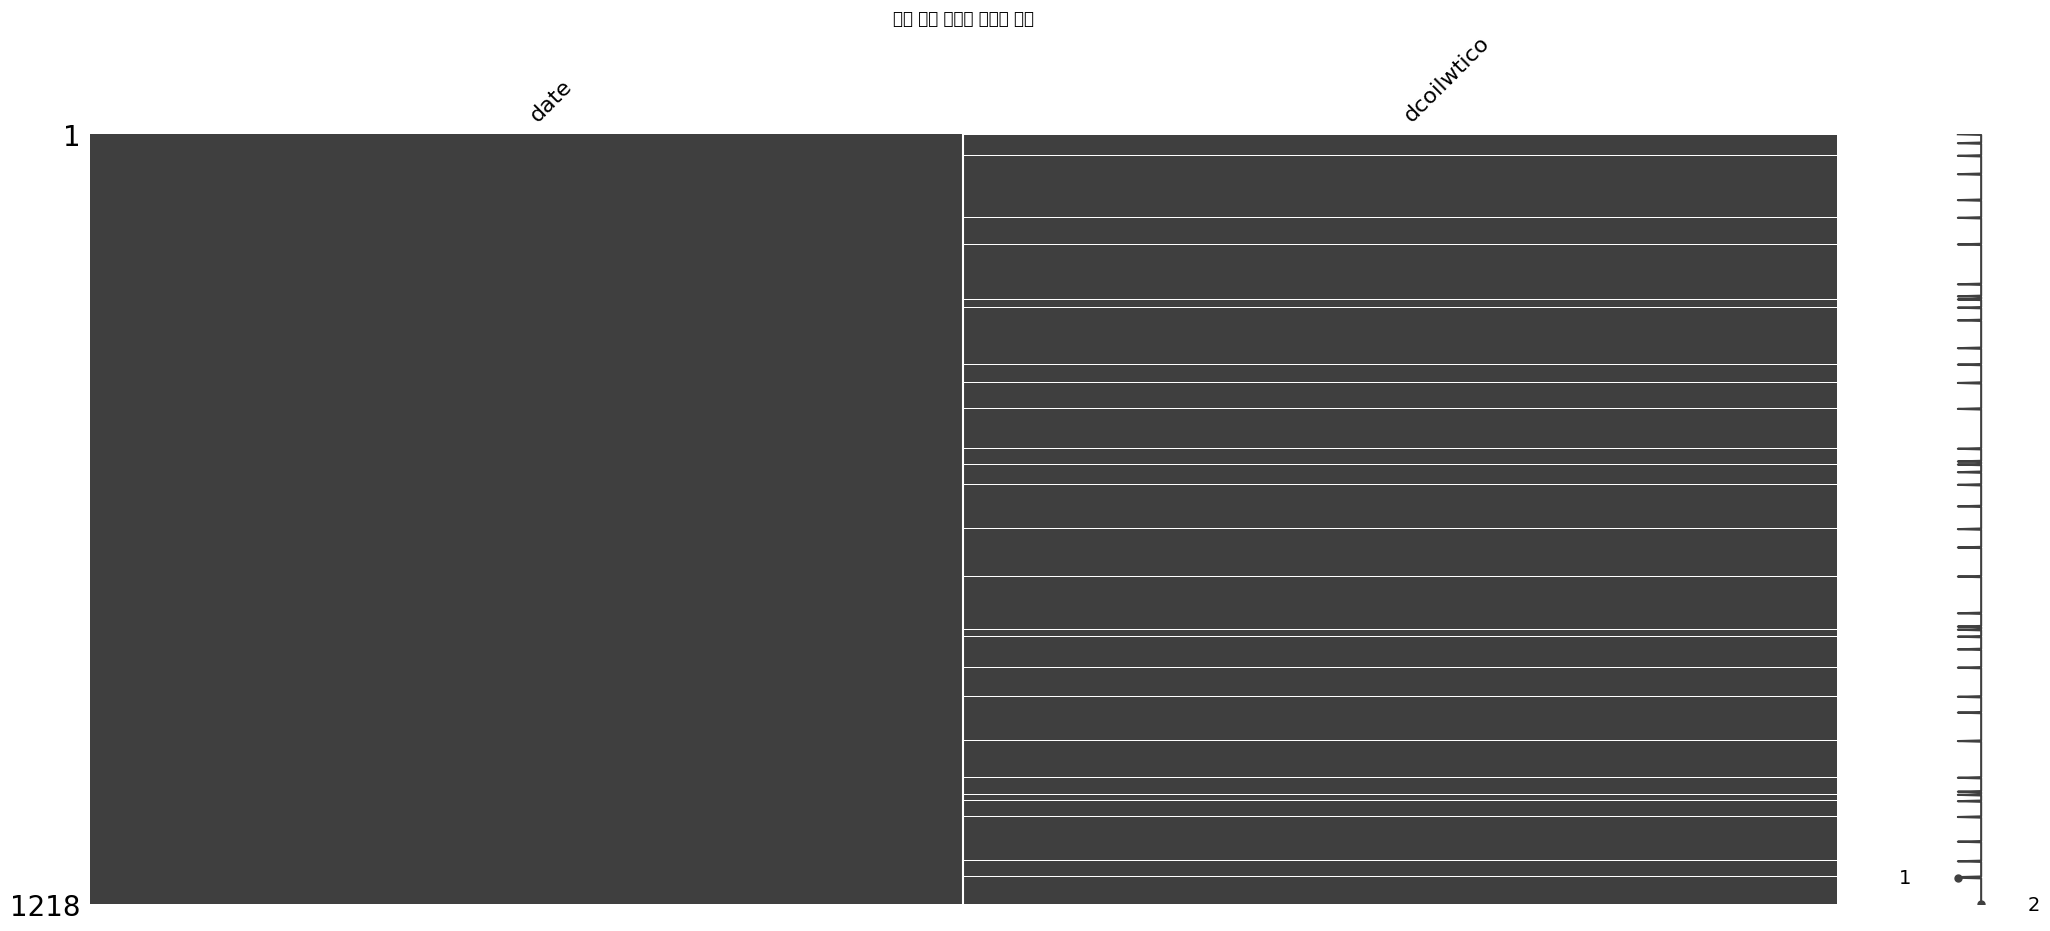

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

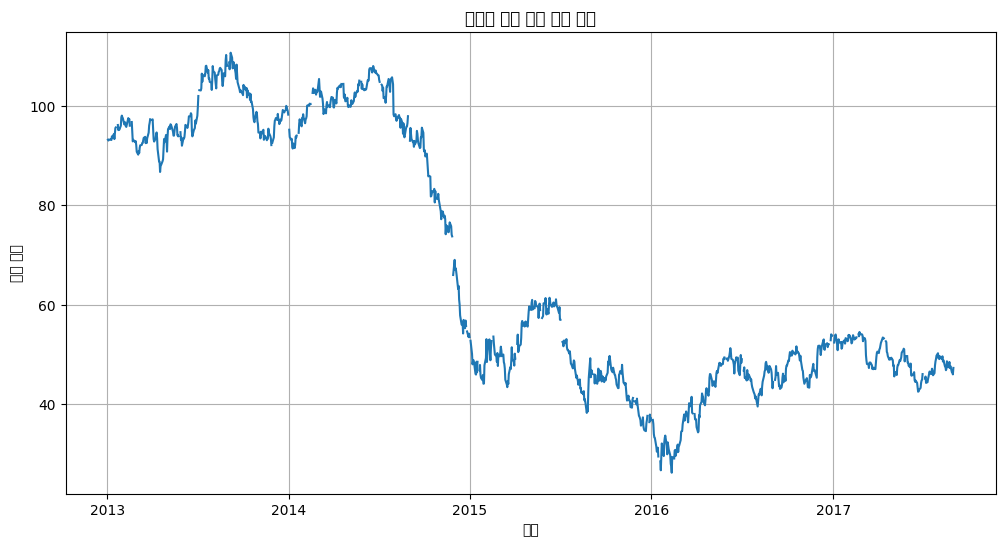

In [20]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20
date          0
dcoilwtico    1
dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

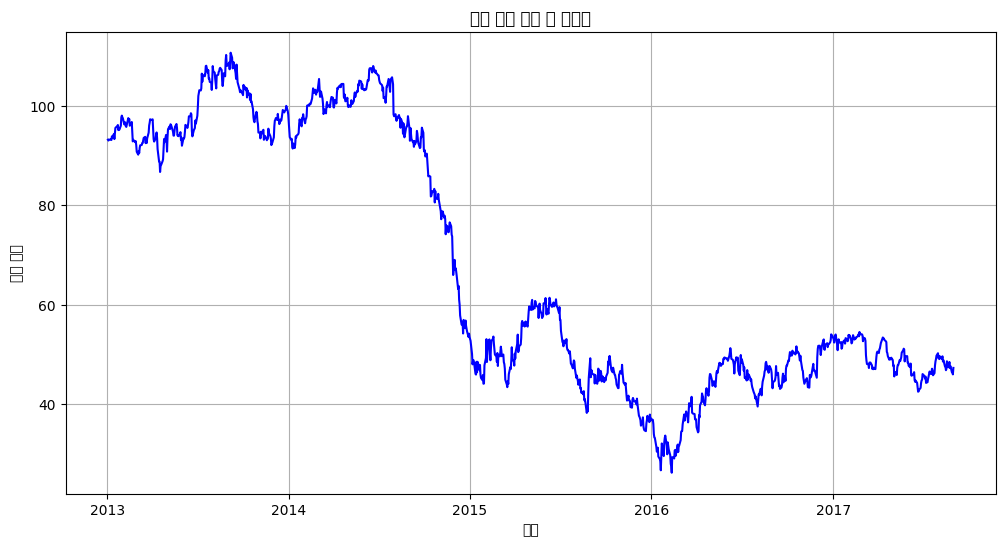

In [35]:
oil_cleaned = oil.copy()
print(oil_cleaned.head())
### 선형 보간법 적용한 원유 가격 데이터

oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate()
print(oil_cleaned.head())
print(oil_cleaned.isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

In [44]:
train.tail()


이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

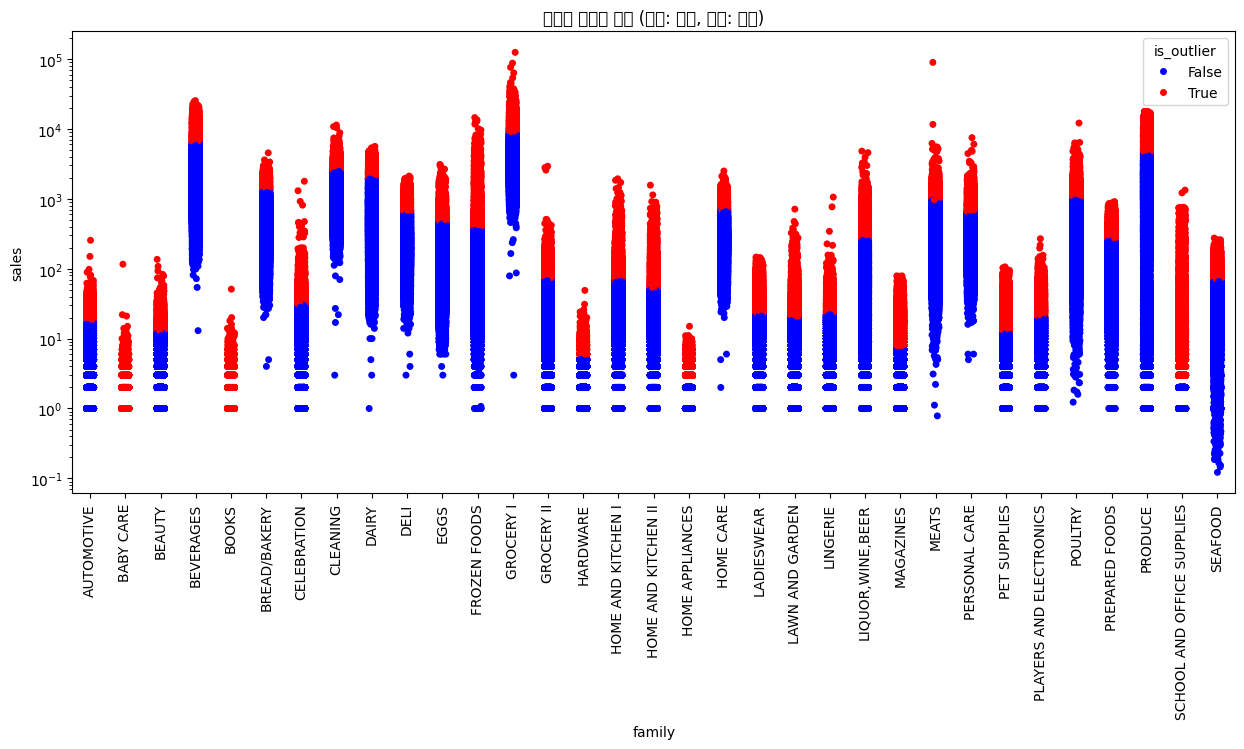

In [49]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [58]:

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'],'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


### 날짜 데이터 처리

In [61]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])



train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x: 1 if x>=5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end



print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

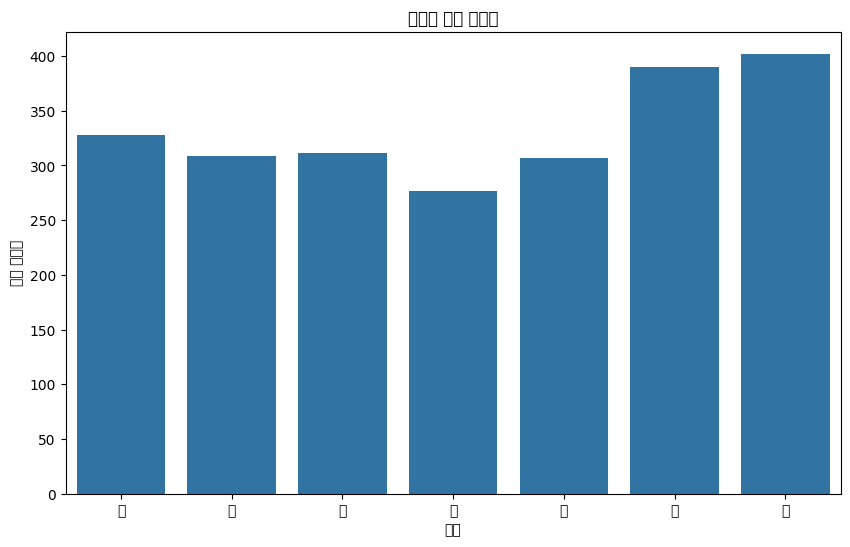

In [63]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()
day_sales['day_name'] = day_sales['dayofweek'].map({
    0: '월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'
})
## 요일 출력값 변경

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [68]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(
    train_cleaned, transactions,
    on=['date', 'store_nbr'],
    how='left'
)

## 매장 데이터 통합
train_with_store = pd.merge(
    train_with_trans, stores,
    on=['store_nbr'],
    how='left'
)

## 원유 데이터 통합
train_final = pd.merge(
    train_with_store, oil_cleaned,
    on='date',
    how='left'
)

print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

최종 데이터셋 정보:
행 개수: 3000888, 열 개수: 19
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end', 'transactions', 'city', 'state', 'type', 'cluster', 'dcoilwtico']
   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   dayofweek  weekend  is_month_start  is_month_end  transactions   city  \
0          1        0            True         False           NaN  Quito   
1          1        0            True         False           NaN  Quito   
2          1        0            True  